# The `analosis` package: an example

**Authors**: Natalie B. Hogg, Pierre Fleury

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides an example of how to use `analosis`, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [1]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
We firstly set up the cosmology. The `id` needs to match one of the cosmologies available in the colossus package: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

In [2]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

### Settings
We then choose the settings for our image generation and analysis.
* `job_name`: a string that determines the file name for your saved images, chains etc
* `generate_image`: can be True or False. If true, generates a new set of images and associated data. If false, looks for pre-existing image data with the job name you passed.
* `MCMC`: can be True or False. If true, an MCMC analysis on the data with the given job name will be run. If false, it will not.
* `number_of_images`: the number of images you want to generate or analyse. for analysing pre-generated images, this setting is ignored.
* `complexity`: the model you want to use to fit the images that you generated (all models are generated using the full LOS model with three shears). The options are: `perfect minimal`, `perfect`, `missing offset`, `missing foreground shear`, `missing halo ellipticity` and `power law`. Other fitting models can be easily implemented in the MCMC class of `analosis`.
* `starting_index`: the numbering system for your saved chain files. Zero by default, but you can set a higher number if you want to re-use a job name without overwriting that job's previous chains.
* `n_burn`: number of burn-in steps for the MCMC
* `n_run`: number of sampling steps for the MCMC

In [3]:
settings = {'job_name': 'test',
            'generate_image': True,
            'MCMC': True,
            'number_of_images': 3,
            'complexity': 'perfect minimal',
            'starting_index': 0,
            'n_burn': 500,
            'n_run': 500}

### Parameters
Now we set the physically relevant parameters.
* `lens_light`: True or False, for if you want lens light to be included in the image and analysis
* `maximum_shear`: the maximum value the LOS shears can take
* `Einstein_radius_min:` the minimum allowed Einstein radius in arcsecs
* `min_aspect_ratio_*`: the minimum aspect ratio for the source, baryon and halo ellipticities
* `maximum_source_offset_factor`: the maximum value for the offset of the source from the centre of the image
* `sigma_halo_offset`: the offset of the halo from the baryonic part of the lens in parsecs

In [4]:
parameters = {'lens_light': False,
              'maximum_shear': 0.05, 
              'Einstein_radius_min': 0.5, # arcsec
              'min_aspect_ratio_source': 0.7,
              'min_aspect_ratio_baryons': 0.7,
              'min_aspect_ratio_nfw': 0.7,
              'maximum_source_offset_factor': 1.0, 
              'sigma_halo_offset': 300} # pc

### Run
Now run the code. The results are automatically saved in the results folder provided by `analosis`.

In [5]:
result = Run(cosmology, settings, parameters)

Starting MCMC


100%|██████████| 1000/1000 [08:08<00:00,  2.05it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  500
Sampling iterations (in current run): 1000
488.5595009326935 time taken for MCMC sampling
Starting MCMC


100%|██████████| 1000/1000 [09:33<00:00,  1.74it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  500
Sampling iterations (in current run): 1000
573.6940252780914 time taken for MCMC sampling
Starting MCMC


100%|██████████| 1000/1000 [08:17<00:00,  2.01it/s]

Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  500
Sampling iterations (in current run): 1000
498.3065221309662 time taken for MCMC sampling

Analysis complete and results saved at /home/natalie/Documents/Projects/los_effects/analosis/analosis/results.


The Run class returns the path to where the results are saved, but you can pass any path you want to the subsequent plotting functions, if you decide to move the data elsewhere.

In [6]:
path = result.pathfinder()

### Import the Plots class

In [7]:
from analosis.analysis.plots import Plots
p = Plots(cosmology, path)

### Image plot

../../analosis/analysis/plots.py:105: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


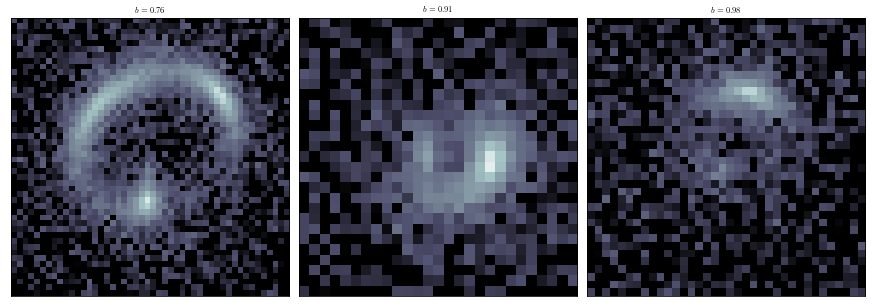

In [8]:
p.image_plot(path, settings, number_of_columns=3, b_max=10, save=True, show=True)

### Input vs output plot
Have a look at the input LOS shear vs the value found by the MCMC. Open circles show unconstrained parameters. To improve the convergence, you can run longer chains. The colour bar corresponds to the image quality (the darker the better).

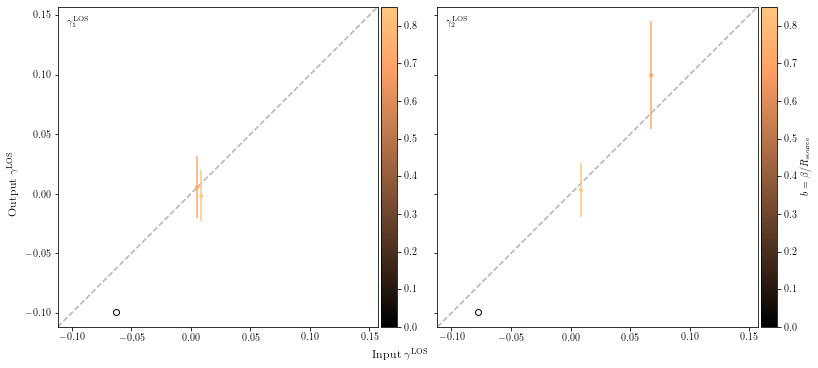

In [9]:
p.input_output_plot(path, settings, b_max = None, show_not_converged=True, use_colourmap=True, save=True, show=True)

### Contour plot
This only plots one chain at a time. The chain files are named like `<job_name>_0.h5`, `<job_name>_1.h5` etc. Set the `chain_number` to the number of the chain you want to plot. You can pass the parameters you want to plot too, as a list of strings. To get an idea what all the parameters are called, you can look at the `<job_name>_input_kwargs.csv` file that is saved with your results.

/home/natalie/anaconda3/lib/python3.8/site-packages/chainconsumer/plotter.py:943: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0.05 * spacing, hspace=0.05 * spacing)


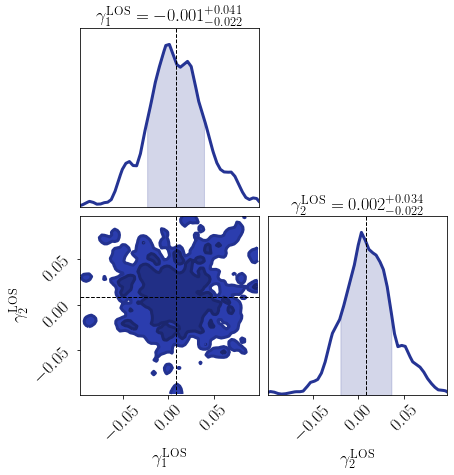

In [12]:
chain_number = 2
plot_params = ['gamma1_los', 'gamma2_los']
size = (6,6)
p.contour_plot(path, settings, chain_number, plot_params, size, draft=False, save=True, show=True)